
# **LAB 8 - DEVELOPING A RANDOM FOREST**
A Random Forest is a collection of **Decision Trees** (Just like a forest). The final output of the random forest is basically based on the output of its consisting decision trees.

# **Hence, First Develop a Decision Tree**

Consider the **dataset** given on the classroom as attached with this file.


---


# **Dataset description**

**TASK --->  Predict whether the income of the person is >50K OR <=50K.**

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: continuous.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


#SUBMISSION INSTRUCTIONS


*   SUBMIT THE FILES **entryno.ipynb** (CODE) and **entryno.pdf** (REPORT)
*   And A zip File **entryno.zip** which consists of the latex files; such that compiling the content of this zip should lead to the same report pdf as in the above point.



#**Q0: DO THE NECESSARY EDA FIRST**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pandas.api.types import is_string_dtype,is_numeric_dtype
from scipy.stats import shapiro
from scipy import stats
import statsmodels.api as sm


In [70]:
from sklearn.metrics import classification_report
from collections import Counter

In [46]:
column_names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']

df_train = pd.read_csv('adulttrain.csv',names=column_names,header=None)
df_test = pd.read_csv('adulttest.csv',names=column_names,header=None)

In [6]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
df_train.shape

(32561, 15)

In [9]:
df_test.shape

(16281, 15)

In [10]:
df_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [11]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df_test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [13]:
df_train.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [14]:
df_test.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,Income
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


In [15]:
numeric_features_train = df_train.select_dtypes(include=np.number)
numeric_features_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


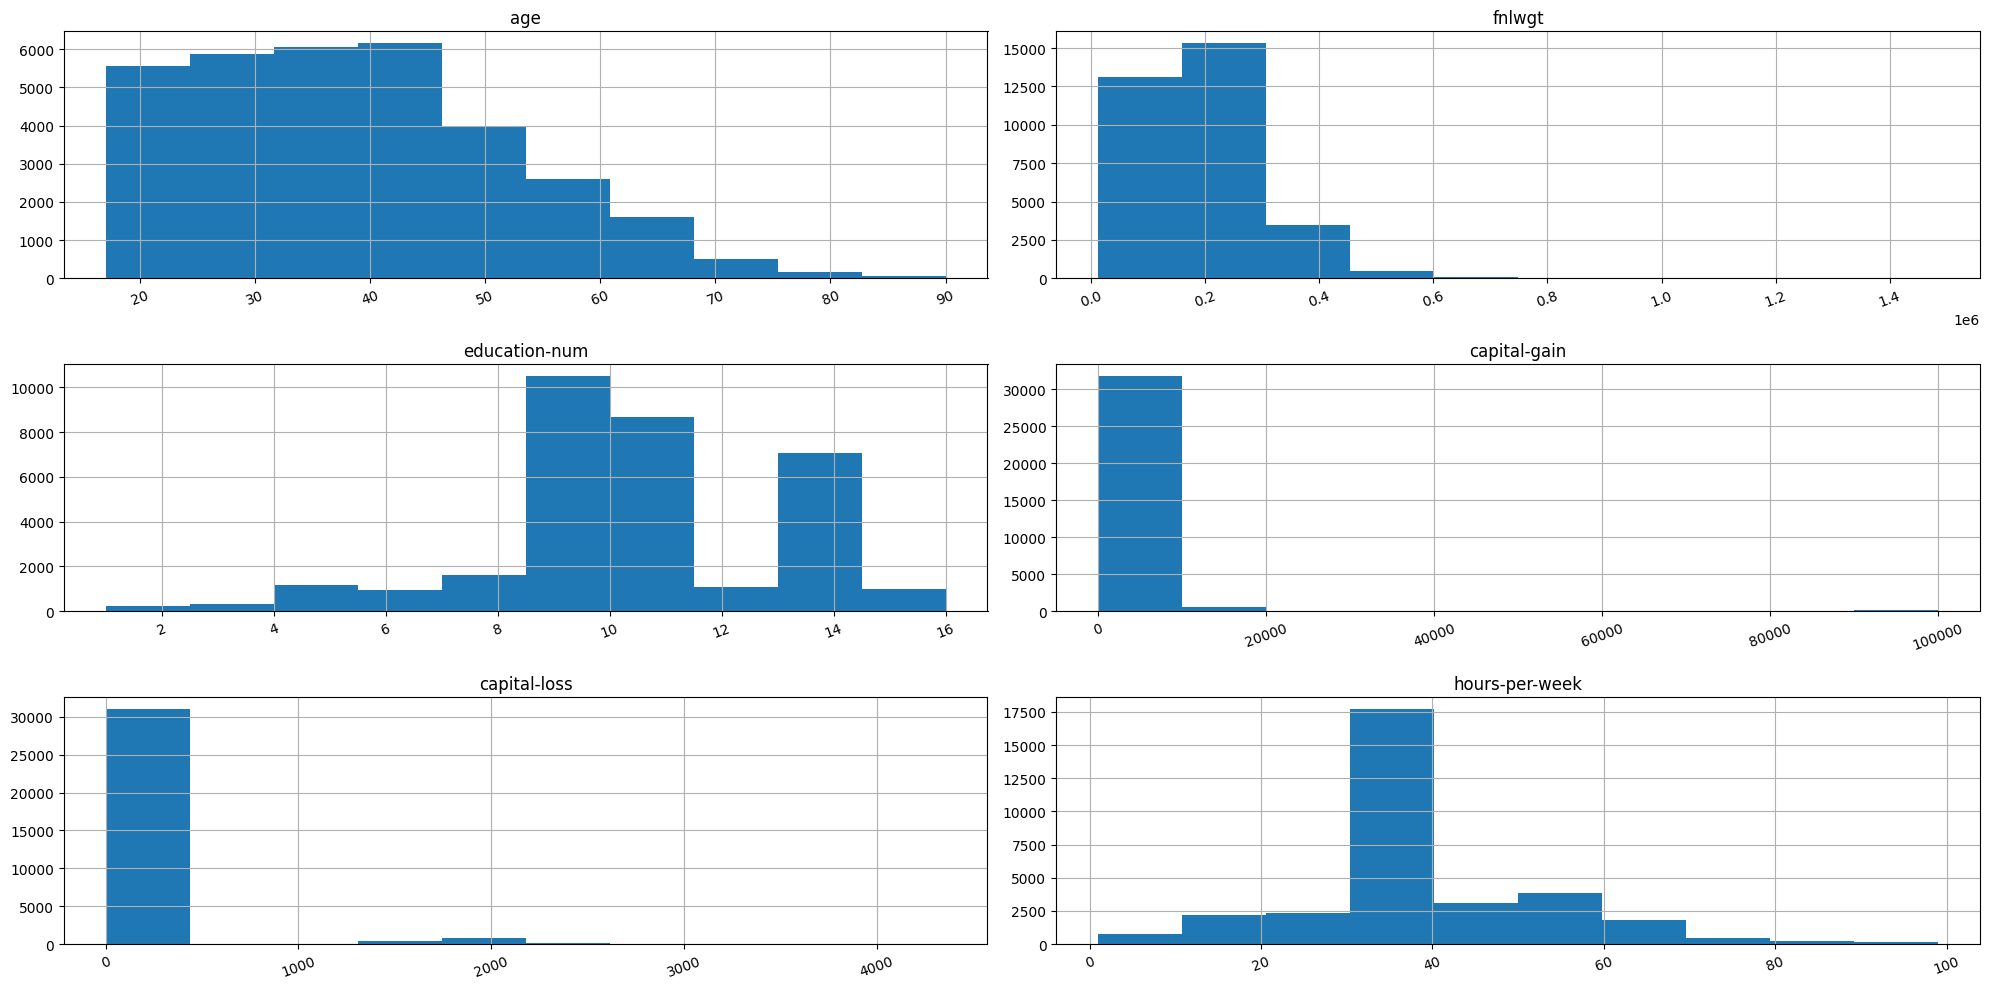

In [16]:
df_train.hist(xrot=20, figsize=(20, 10))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

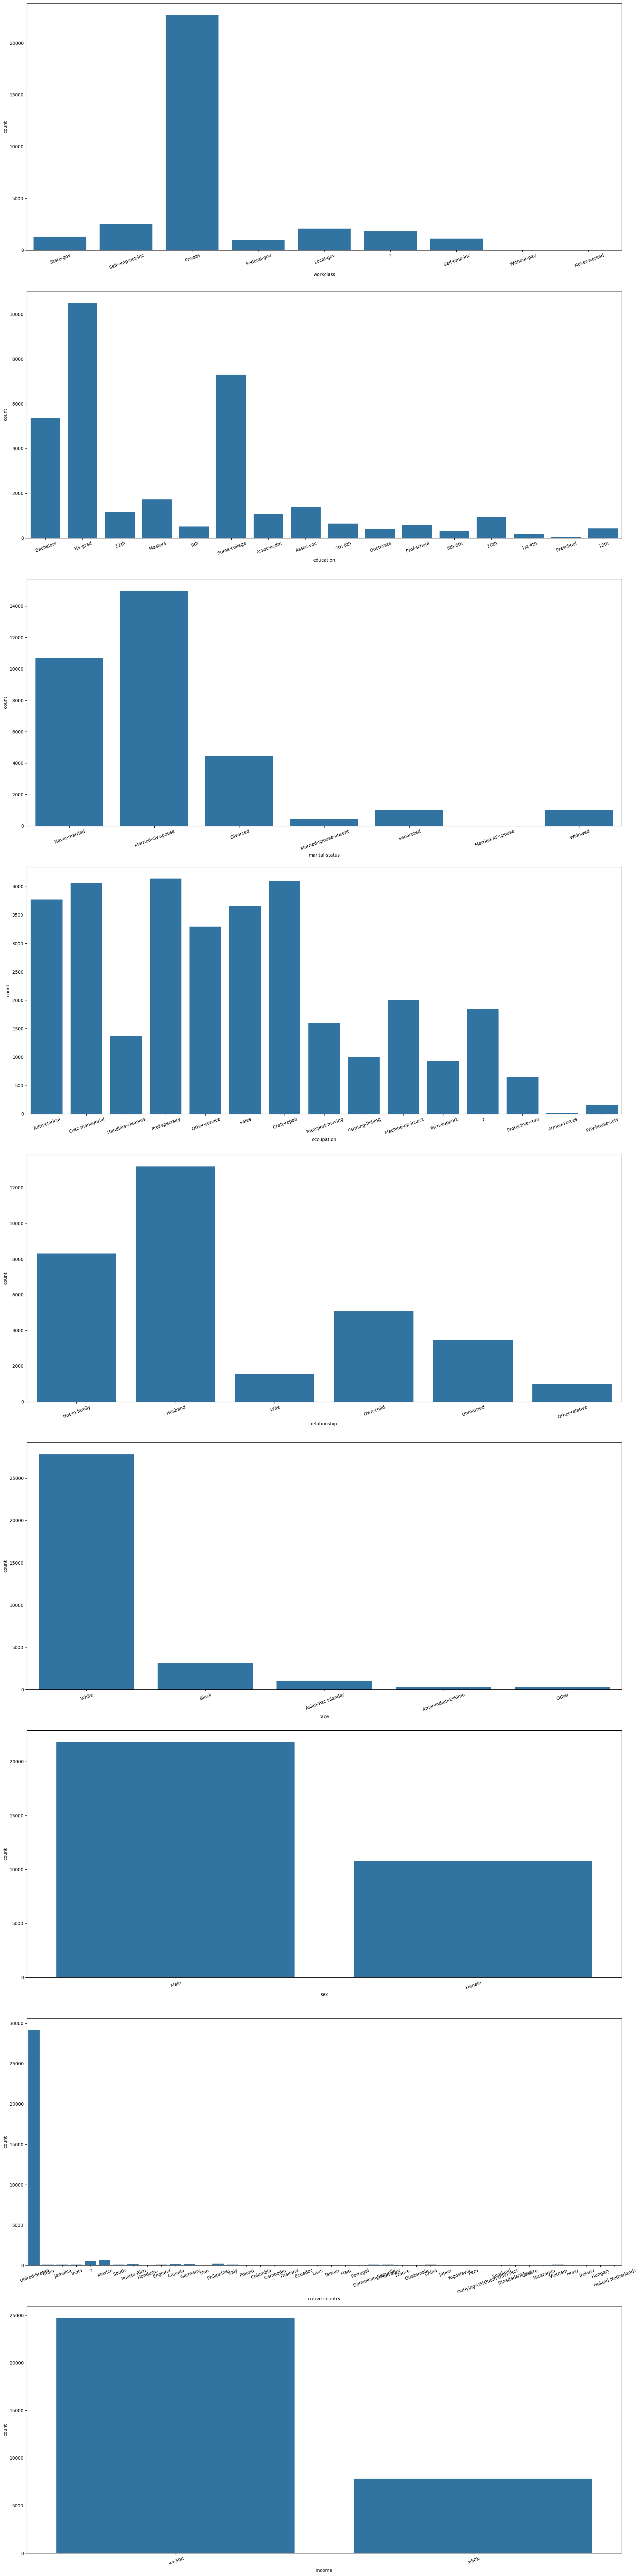

In [17]:
# create an empty list to store all the categorical variables
categorical= []

# check the data type of each variable
for i in df_train.columns:

    # check if the variable has the categorical type
  if is_string_dtype(df_train[i]):

        # append the categorical variables to the list 'categorical'
    categorical.append(i)
# plot the count plot for each categorical variable
# 'figsize' sets the figure size
plt.figure(figsize=(20,80))

# plot the count plot using countplot() for each categorical variable
for i,col in enumerate(categorical,1):
    plt.subplot(len(categorical),1,i)
    sns.countplot(data=df_train,x=col)
    plt.xticks(rotation=20)

plt.tight_layout()



# display the plot
plt.show()

<Axes: xlabel='Income', ylabel='count'>

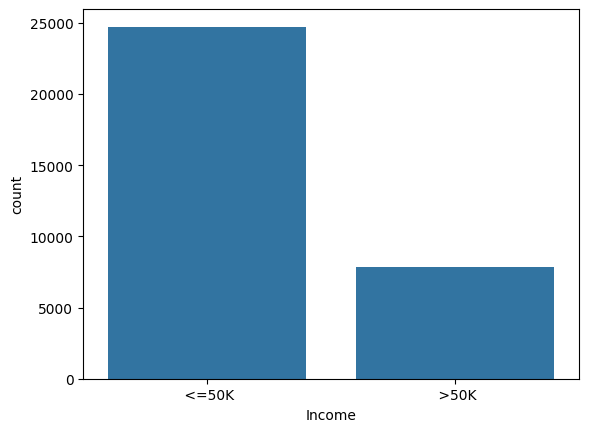

In [18]:
sns.countplot(data=df_train,x='Income')

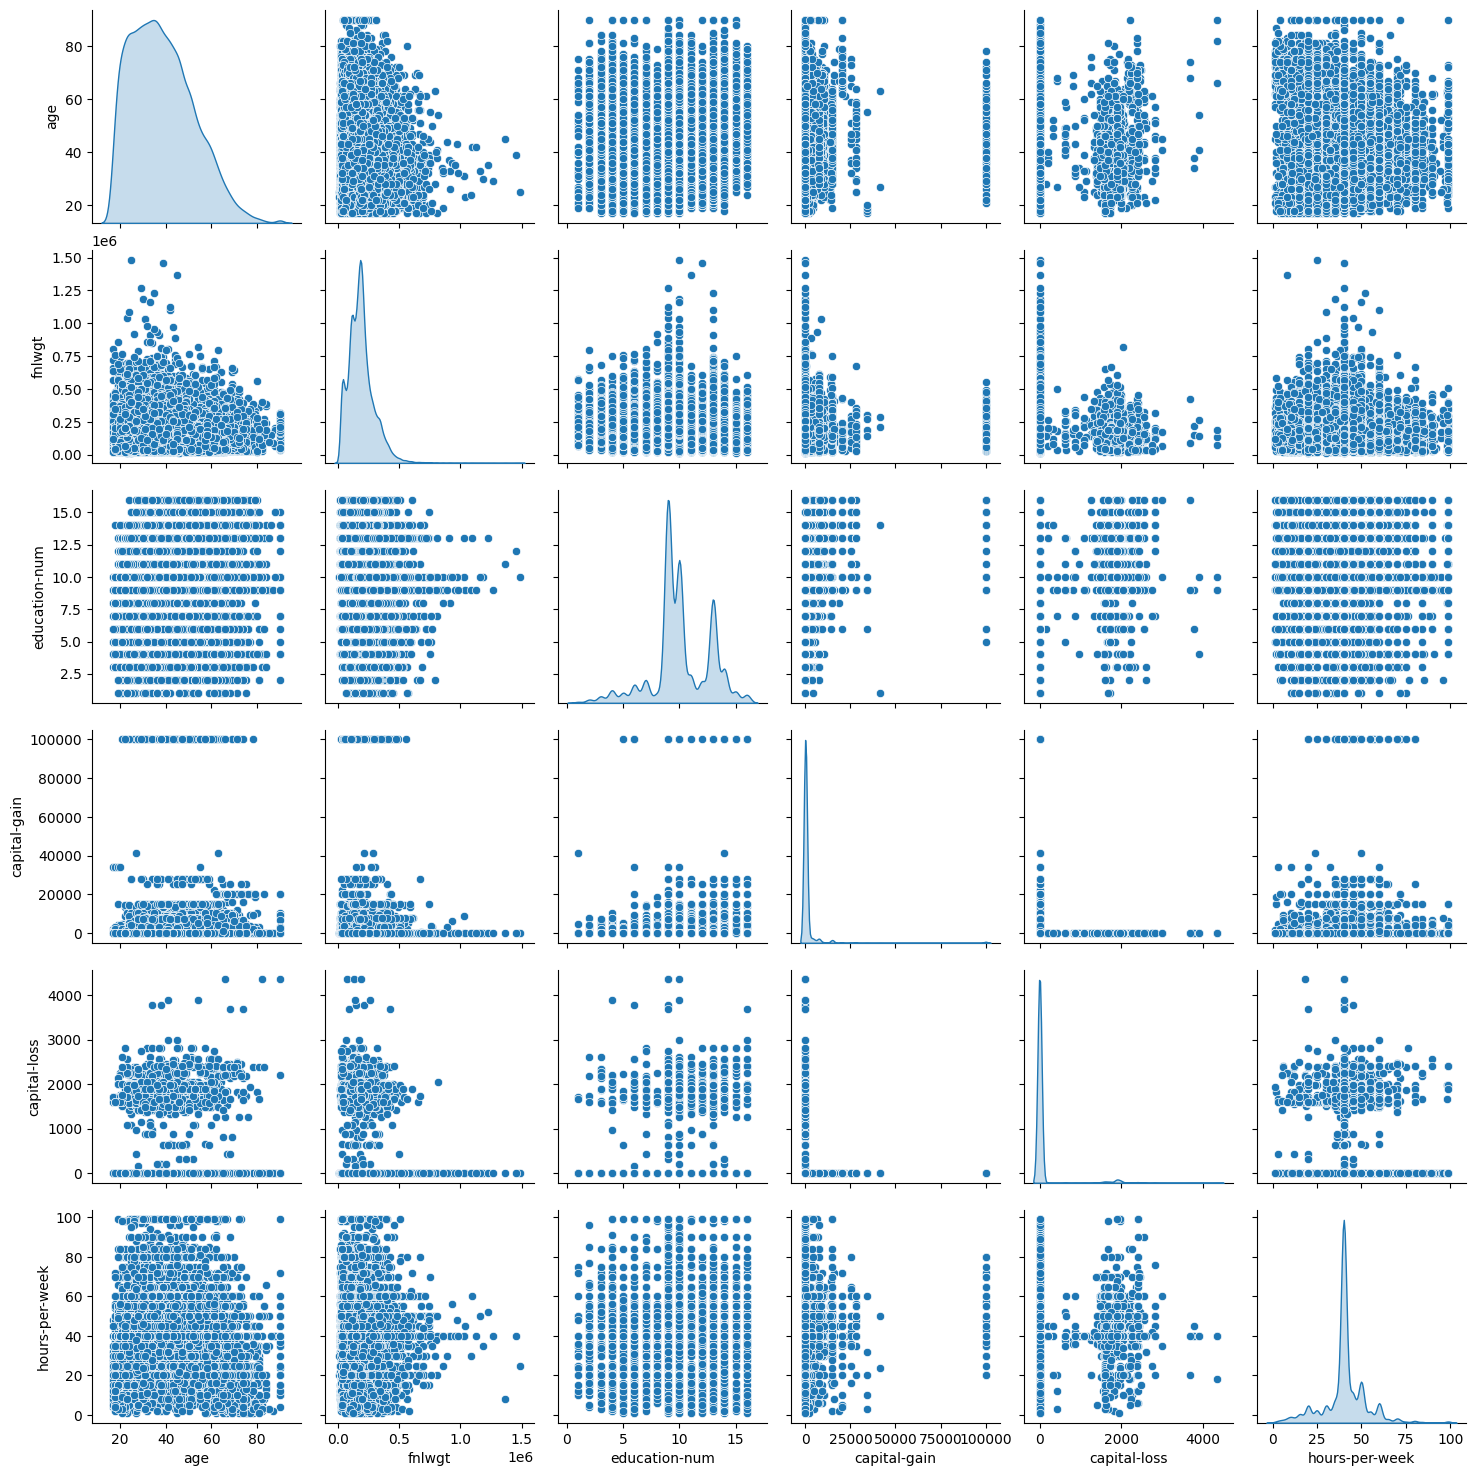

In [19]:
# Pairplot of numeric variables
# select the columns for the pairplot
numeric_cols = numeric_features_train.columns

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(data = df_train[numeric_cols], diag_kind = 'kde',kind = 'scatter')

# display the plot
plt.show()

In [20]:
numeric_features_test = df_test.select_dtypes(include=np.number)
numeric_features_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
16276,39,215419,13,0,0,36
16277,64,321403,9,0,0,40
16278,38,374983,13,0,0,50
16279,44,83891,13,5455,0,40


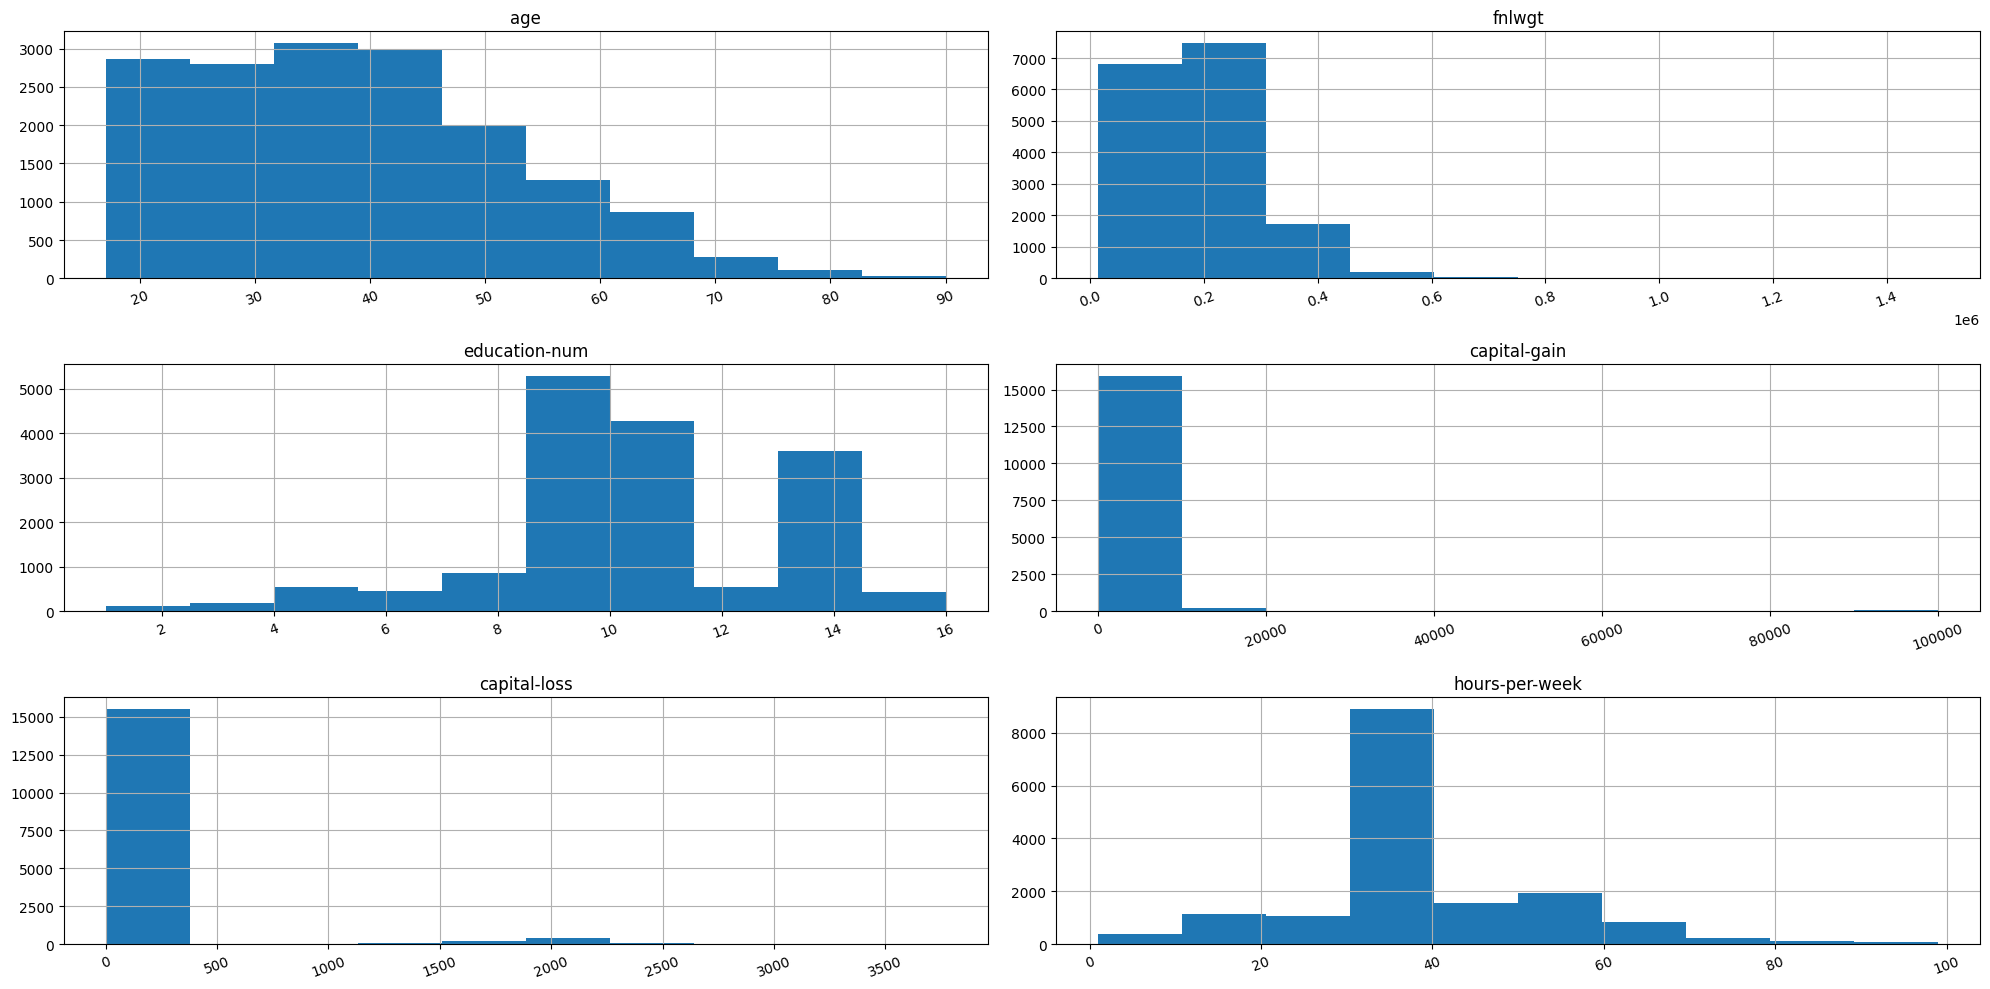

In [21]:
df_test.hist(xrot=20, figsize=(20, 10))

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

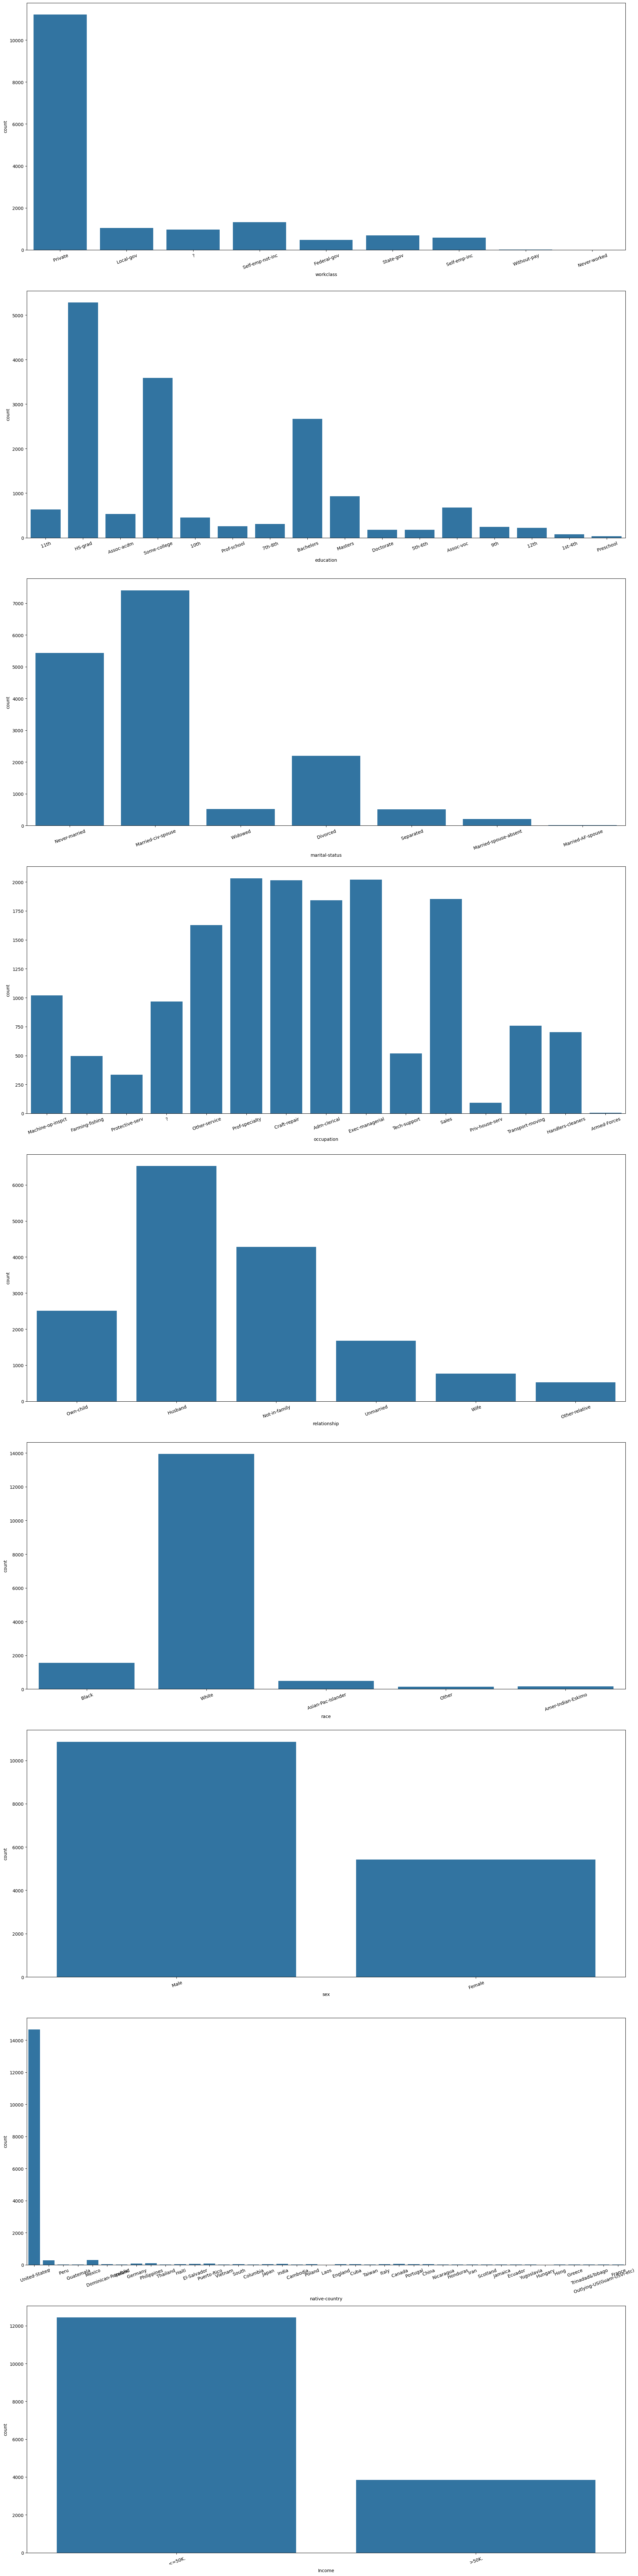

In [22]:
# create an empty list to store all the categorical variables
categorical= []

# check the data type of each variable
for i in df_test.columns:

    # check if the variable has the categorical type
  if is_string_dtype(df_test[i]):

        # append the categorical variables to the list 'categorical'
    categorical.append(i)
# plot the count plot for each categorical variable
# 'figsize' sets the figure size
plt.figure(figsize=(20,80))

# plot the count plot using countplot() for each categorical variable
for i,col in enumerate(categorical,1):
    plt.subplot(len(categorical),1,i)
    sns.countplot(data=df_test,x=col)
    plt.xticks(rotation=20)

plt.tight_layout()



# display the plot
plt.show()

In [23]:
df_train.isnull().sum().sort_values(ascending=False)

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [24]:
df_test.isnull().sum().sort_values(ascending=False)

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


Text(0.5, 1.0, 'Correlation Heatmap')

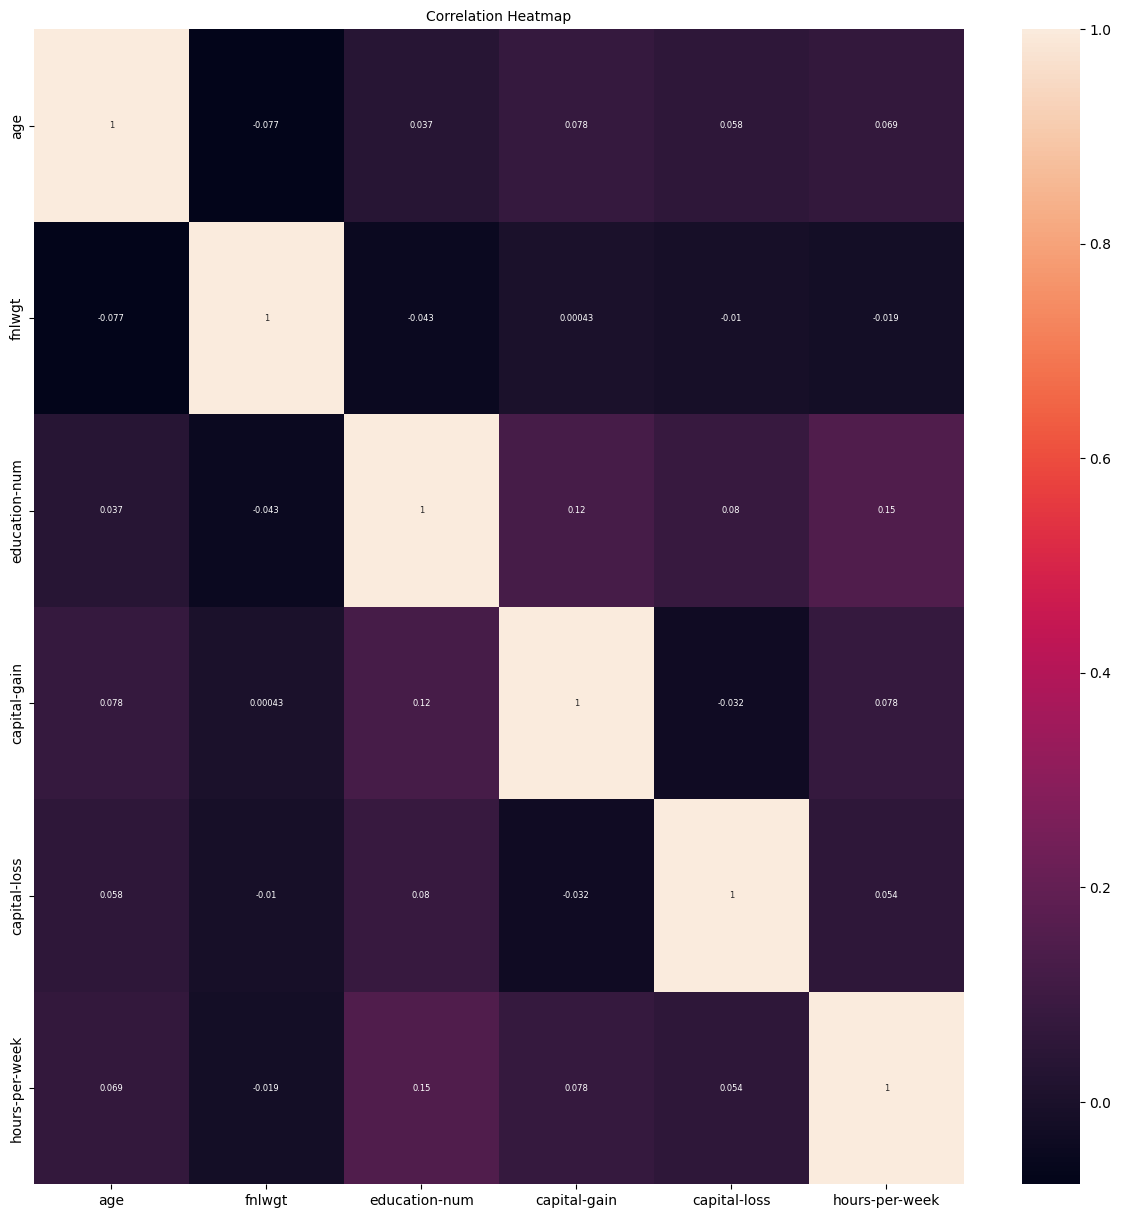

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(numeric_features_train.corr(),annot=True,annot_kws={'fontsize':6})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap',fontsize=10)


In [54]:
df_train['Income'] = df_train['Income'].apply(lambda x: 1 if x== ' >50K' else 0)


In [62]:
df_test['Income'] = df_test['Income'].apply(lambda x: 1 if x == ' >50K.' else 0)


In [63]:
df_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [55]:
df_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [65]:
from sklearn.preprocessing import LabelEncoder

# make copies to avoid modifying originals
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

label_encoders = {}

for col in df_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    le.fit(df_train[col])  # fit only on df_training data

    df_train_encoded[col] = le.transform(df_train[col])
    df_test_encoded[col] = le.transform(df_test[col])

    label_encoders[col] = le

In [66]:
df_test_encoded


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,39,0
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,39,0
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,39,0
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,39,0


In [67]:
df_train_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


#**Q1: Implement a decision tree for the above classification problem**
*   The node splitting criteria should be based on **Information Gain** as discussed in the class.
*   The implementation should have the provision for both **Depth Selection** of the tree and **Pruning** at the nodes.
*   Train multiple trees with different depth values (atleast 8 values) and pruning ratios (atleast 2 ratios).
*   There will be atleast 16 trees (More the better, but < 30). Test all of them on the given testing set.
*   The report should have the classification metrics for all the trees in a **presentable and clear** way.
*   Hint : Use Recursive Functions.

In [108]:
class DecisionTreeNode:
    def __init__(self, depth=0):
        self.depth = depth
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None
        self.label = None

In [110]:
# function to compute entropy.
def entropy(y):
    counts = Counter(y)
    probabilities = np.array([count / len(y) for count in counts.values()])
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

In [111]:
# function to compute information gain
def information_gain(y, subsets):
    H_before = entropy(y)
    H_after = sum((len(subset)/len(y)) * entropy(subset) for subset in subsets if len(subset) > 0)
    return H_before - H_after

In [112]:
# function to split dataset for numerical and categorical features
def split_dataset(X, y, feature, is_categorical):
    values = X.iloc[:, feature] if isinstance(X, pd.DataFrame) else X[:, feature]
    best_gain = 0
    best_threshold = None
    best_splits = None

    if is_categorical:
        unique_values = np.unique(values)
        for val in unique_values:
            left_idx = values == val
            right_idx = values != val
            if np.any(left_idx) and np.any(right_idx):
                left_y, right_y = y[left_idx], y[right_idx]
                gain = information_gain(y, [left_y, right_y])
                if gain > best_gain:
                    best_gain = gain
                    best_threshold = val
                    best_splits = (left_idx, right_idx)
    else:
        thresholds = np.unique(values)
        for t in thresholds:
            left_idx = values <= t
            right_idx = values > t
            if np.any(left_idx) and np.any(right_idx):
                left_y, right_y = y[left_idx], y[right_idx]
                gain = information_gain(y, [left_y, right_y])
                if gain > best_gain:
                    best_gain = gain
                    best_threshold = t
                    best_splits = (left_idx, right_idx)

    return best_gain, best_threshold, best_splits


In [113]:
# recursive function to build tree
def build_tree(X, y, feature_types, depth=0, max_depth=5, min_samples=1):
    node = DecisionTreeNode(depth)

    if len(set(y)) == 1 or depth >= max_depth or len(y) <= min_samples:
        node.label = Counter(y).most_common(1)[0][0]
        return node

    n_features = X.shape[1]
    best_gain = 0
    best_feature = None
    best_threshold = None
    best_splits = None

    for feature in range(n_features):
        is_categorical = feature_types.iloc[feature] == 'categorical' if isinstance(feature_types, pd.Series) else feature_types[feature] == 'categorical'
        gain, threshold, splits = split_dataset(X, y, feature, is_categorical)
        if gain > best_gain:
            best_gain = gain
            best_feature = feature
            best_threshold = threshold
            best_splits = splits

    if best_gain == 0:
        node.label = Counter(y).most_common(1)[0][0]
        return node

    left_idx, right_idx = best_splits
    node.feature = best_feature
    node.threshold = best_threshold
    node.left = build_tree(X[left_idx], y[left_idx], feature_types, depth+1, max_depth, min_samples)
    node.right = build_tree(X[right_idx], y[right_idx], feature_types, depth+1, max_depth, min_samples)
    return node

In [114]:
def predict_one(node, x, feature_types):
    while node.label is None:
        if feature_types[node.feature] == 'categorical':
            if x[node.feature] == node.threshold:
                node = node.left
            else:
                node = node.right
        else:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
    return node.label

def predict(tree, X, feature_types):
    return np.array([predict_one(tree, x, feature_types) for x in X])


In [128]:
# train and evaluate different trees
def train_and_evaluate(X_train, y_train, X_test, y_test, feature_types, depths, pruning_ratios):
    results = []
    for depth in depths:
        for prune_ratio in pruning_ratios:
            min_samples = int(len(X_train) * prune_ratio)
            tree = build_tree(X_train, y_train, feature_types, max_depth=depth, min_samples=min_samples)
            y_pred = predict(tree, X_test.values if isinstance(X_test, pd.DataFrame) else X_test, feature_types)
            report = classification_report(y_test, y_pred, output_dict=True)
            results.append({
                'depth': depth,
                'prune_ratio': prune_ratio,
                'accuracy': report['accuracy'],
                'precision': report['1']['precision'],
                'recall': report['1']['recall'],
                'f1-score': report['1']['f1-score']
            })
    return pd.DataFrame(results)


In [116]:
x_train=df_train.drop('Income',axis=1)

In [117]:
y_train=df_train['Income']

In [118]:
x_train.shape

(32561, 14)

In [119]:
y_train.shape

(32561,)

In [120]:
x_test=df_test.drop('Income',axis=1)

In [121]:
y_test=df_test['Income']

In [122]:
x_test.shape

(16281, 14)

In [123]:
y_test.shape

(16281,)

In [126]:
feature_types = ['categorical' if dtype == 'object' or dtype.name == 'category' else 'numerical'
                 for dtype in x_train.dtypes]


In [127]:
feature_types

['numerical',
 'categorical',
 'numerical',
 'categorical',
 'numerical',
 'categorical',
 'categorical',
 'categorical',
 'categorical',
 'categorical',
 'numerical',
 'numerical',
 'numerical',
 'categorical']

In [130]:
# list of 8 different depths
depths = [2, 4, 6, 8, 10, 12, 14, 16]

# list of 2 pruning ratios
pruning_ratios = [0.2, 0.1]

results_df = train_and_evaluate(x_train, y_train, x_test, y_test, feature_types, depths, pruning_ratios)

# print or save results
print(results_df)

    depth  prune_ratio  accuracy  precision    recall  f1-score
0       2          0.2  0.830662   0.732196  0.446438  0.554676
1       2          0.1  0.830662   0.732196  0.446438  0.554676
2       4          0.2  0.844788   0.755323  0.507280  0.606937
3       4          0.1  0.844788   0.755323  0.507280  0.606937
4       6          0.2  0.844788   0.755323  0.507280  0.606937
5       6          0.1  0.851729   0.782780  0.515341  0.621511
6       8          0.2  0.844788   0.755323  0.507280  0.606937
7       8          0.1  0.851729   0.782780  0.515341  0.621511
8      10          0.2  0.844788   0.755323  0.507280  0.606937
9      10          0.1  0.851729   0.782780  0.515341  0.621511
10     12          0.2  0.844788   0.755323  0.507280  0.606937
11     12          0.1  0.851729   0.782780  0.515341  0.621511
12     14          0.2  0.844788   0.755323  0.507280  0.606937
13     14          0.1  0.851729   0.782780  0.515341  0.621511
14     16          0.2  0.844788   0.755

In [131]:
best_tree = results_df.sort_values(by='f1-score', ascending=False).iloc[0]
print("Best Decision Tree:")
print(best_tree)


Best Decision Tree:
depth          8.000000
prune_ratio    0.100000
accuracy       0.851729
precision      0.782780
recall         0.515341
f1-score       0.621511
Name: 7, dtype: float64


# **Q2: NOW MAKE A RANDOM FOREST**

This Forest should have a minimum of 11 trees (Keep it odd) of your choice of hyperparameters (depth, pruning, node splitting criteria)

Check the performance metric of the Random Forest **Versus** the best decision tree from the above question.

In [132]:
import random

# function to generate a bootstrap sample
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

In [133]:
# train multiple trees using random feature selection and bootstrapping
def random_forest_train(X, y, feature_types, n_trees=11, max_depth=5, prune_ratio=0.1, max_features=None):
    forest = []
    n_features = X.shape[1]
    max_features = max_features or int(np.sqrt(n_features))  # like sklearn default

    for _ in range(n_trees):
        X_sample, y_sample = bootstrap_sample(X, y)
        features_idx = np.random.choice(n_features, size=max_features, replace=False)
        X_reduced = X_sample[:, features_idx]
        reduced_feature_types = [feature_types[i] for i in features_idx]
        min_samples = int(len(X_sample) * prune_ratio)

        tree = build_tree(X_reduced, y_sample, reduced_feature_types, max_depth=max_depth, min_samples=min_samples)
        forest.append((tree, features_idx, reduced_feature_types))

    return forest


In [134]:
# predict using majority voting
def random_forest_predict(forest, X):
    predictions = []

    for x in X:
        votes = []
        for tree, features_idx, feature_types in forest:
            x_reduced = x[features_idx]
            pred = predict_one(tree, x_reduced, feature_types)
            votes.append(pred)
        final_vote = Counter(votes).most_common(1)[0][0]
        predictions.append(final_vote)

    return np.array(predictions)

In [135]:
def tune_forest(X_train, y_train, X_test, y_test, feature_types,
                depths=[2,4,6,8,10,12], prune_ratios=[0.1, 0.2], n_trees=11):

    results = []
    best_score = 0
    best_model = None
    best_params = {}

    for depth in depths:
        for ratio in prune_ratios:
            forest = random_forest_train(X_train, y_train, feature_types,
                                          n_trees=n_trees, max_depth=depth, prune_ratio=ratio)
            y_pred = random_forest_predict(forest, X_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            f1 = report['1']['f1-score']  # assuming '1' is the positive class

            results.append({
                'max_depth': depth,
                'prune_ratio': ratio,
                'accuracy': report['accuracy'],
                'f1-score': f1,
                'precision': report['1']['precision'],
                'recall': report['1']['recall']
            })

            if f1 > best_score:
                best_score = f1
                best_model = forest
                best_params = {'max_depth': depth, 'prune_ratio': ratio}

    results_df = pd.DataFrame(results)
    return results_df, best_model, best_params


In [138]:
# Run tuning and get best forest
tuning_results, best_forest, best_params = tune_forest(
    x_train.values, y_train.values, x_test.values, y_test.values, feature_types)

print("Best Parameters:", best_params)
print(tuning_results)

# Use best_forest to predict on test data
final_preds = random_forest_predict(best_forest, x_test)
final_report = classification_report(y_test, final_preds)
print(final_report)

Best Parameters: {'max_depth': 12, 'prune_ratio': 0.1}
    max_depth  prune_ratio  accuracy  f1-score  precision  recall
0           2          0.1     0.845     0.821      0.790   0.854
1           2          0.2     0.838     0.808      0.775   0.843
2           4          0.1     0.857     0.833      0.805   0.863
3           4          0.2     0.851     0.822      0.795   0.850
4           6          0.1     0.861     0.840      0.812   0.870
5           6          0.2     0.855     0.827      0.798   0.857
6           8          0.1     0.865     0.846      0.819   0.875
7           8          0.2     0.859     0.835      0.808   0.863
8          10          0.1     0.868     0.850      0.823   0.880
9          10          0.2     0.861     0.838      0.812   0.865
10         12          0.1     0.869     0.851      0.826   0.876
11         12          0.2     0.860     0.837      0.810   0.865

              precision    recall  f1-score   support

           0       0.91      0.

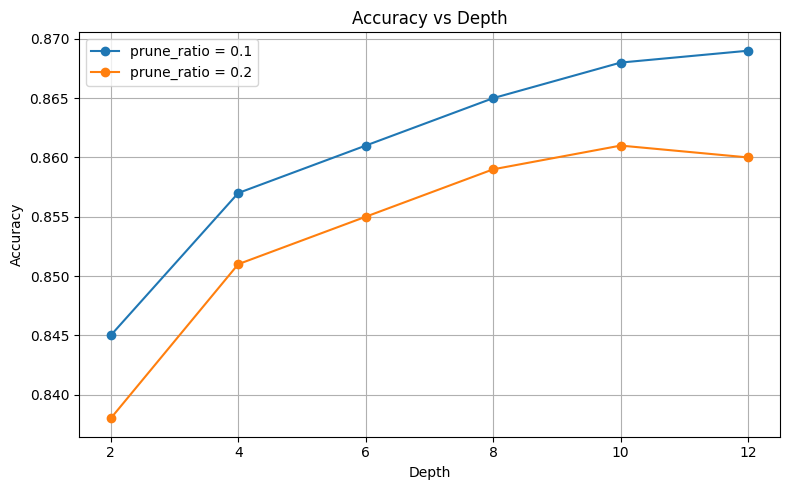

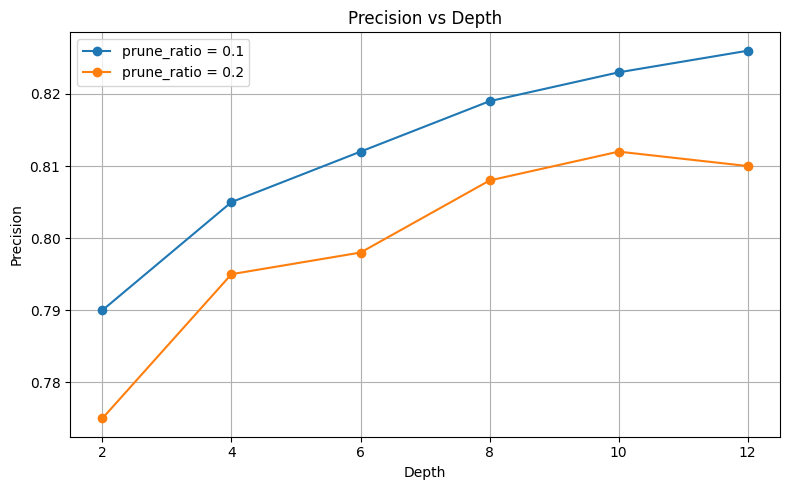

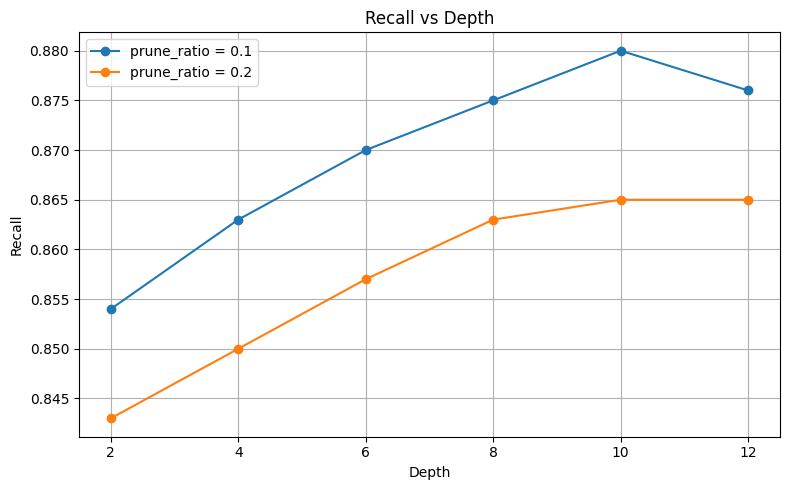

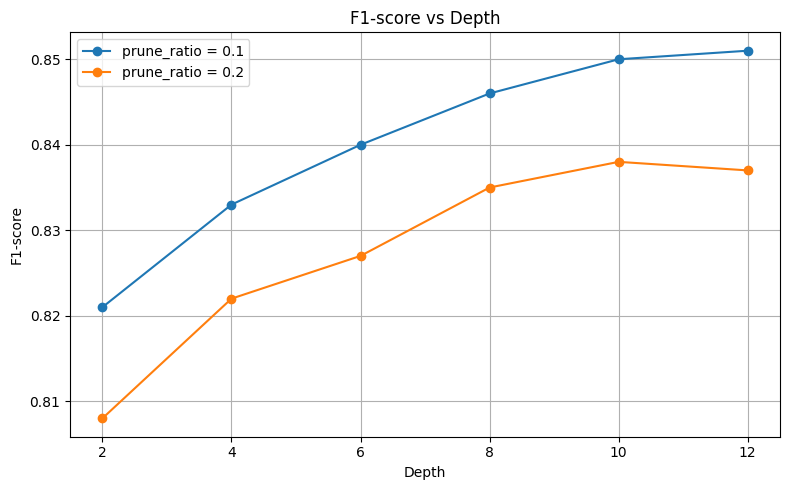

In [157]:
import matplotlib.pyplot as plt

# define plot function
def plot_metric(df, metric, title):
    plt.figure(figsize=(8, 5))
    for ratio in sorted(df['prune_ratio'].unique()):
        subset = df[df['prune_ratio'] == ratio]
        plt.plot(subset['max_depth'], subset[metric], marker='o', label=f'prune_ratio = {ratio}')
    plt.title(title)
    plt.xlabel('Depth')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# generate plots for each metric
plot_metric(tuning_results, 'accuracy', 'Accuracy vs Depth')
plot_metric(tuning_results, 'precision', 'Precision vs Depth')
plot_metric(tuning_results, 'recall', 'Recall vs Depth')
plot_metric(tuning_results, 'f1-score', 'F1-score vs Depth')


#**Q3: Compare the Performance of your Implemented version of RANDOM FOREST with the INBUILT RANDOM FOREST CLASSIFIER and the INBUILT LOGISTIC REGRESSION MODEL**

But this time, for this question only, you can use the inbuilt classifiers for comparison purpose.


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [141]:
x_train_encoded=df_train_encoded.drop('Income' ,axis=1)
y_train_encoded=df_train_encoded['Income']

In [142]:
x_test_encoded=df_test_encoded.drop('Income' ,axis=1)
y_test_encoded=df_test_encoded['Income']

In [143]:
# --- Step 4: Sklearn RandomForest ---
sk_rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
sk_rf.fit(x_train_encoded, y_train_encoded)
sk_rf_preds = sk_rf.predict(x_test_encoded)

In [145]:
print("=== Sklearn RandomForest ===")
print(classification_report(y_test_encoded, sk_rf_preds))

=== Sklearn RandomForest ===
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12435
           1       0.80      0.50      0.61      3846

    accuracy                           0.85     16281
   macro avg       0.83      0.73      0.76     16281
weighted avg       0.85      0.85      0.84     16281



In [146]:
# --- Step 5: Logistic Regression ---
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_encoded, y_train_encoded)
logreg_preds = logreg.predict(x_test_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print("=== Logistic Regression ===")
print(classification_report(y_test, logreg_preds))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     12435
           1       0.66      0.37      0.47      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.65      0.68     16281
weighted avg       0.79      0.80      0.78     16281



In [149]:
print(final_report)


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       300
           1       0.83      0.88      0.85       250

    accuracy                           0.87       550
   macro avg       0.87      0.87      0.87       550
weighted avg       0.87      0.87      0.87       550



#**Note - Follow all the above instructions Carefully.**